In [1]:
import tensorflow as tf
import os
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, ReLU, BatchNormalization, Input
import cv2 as cv
import mediapipe as mp

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
train_path = "/Users/timii/Developer/Zummit/fer_data/FER-2013/test"
test_path = "/Users/timii/Developer/Zummit/fer_data/FER-2013/test"
emotions = os.listdir(train_path)

len_train = {}
len_test = {}

for emotion in emotions:
    file_train = os.listdir(os.path.join(train_path, emotion))
    len_train[emotion] = len(file_train)
    
    file_test = os.listdir(os.path.join(test_path, emotion))
    len_test[emotion] = len(file_test)

print("Train: ", len_train)
print("Test: ", len_test)

total_train = sum(len_train.values())
total_test = sum(len_test.values())

print("Total Train: ", total_train)
print("Total Test: ", total_test)

Train:  {'happy': 1774, 'sad': 1247, 'fear': 1024, 'surprise': 831, 'neutral': 1233, 'angry': 958, 'disgust': 111}
Test:  {'happy': 1774, 'sad': 1247, 'fear': 1024, 'surprise': 831, 'neutral': 1233, 'angry': 958, 'disgust': 111}
Total Train:  7178
Total Test:  7178


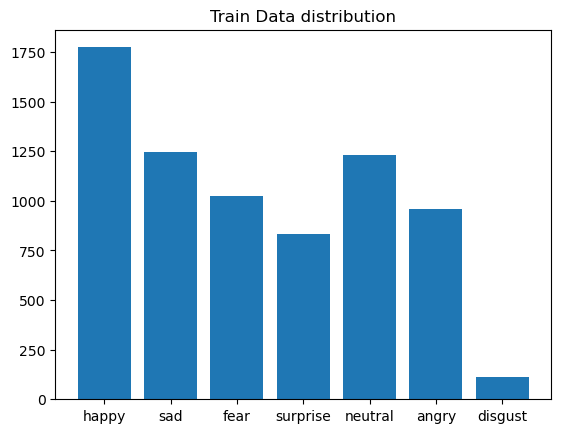

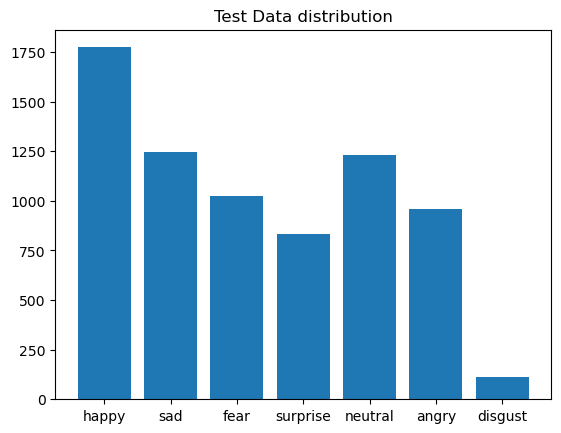

In [4]:
plt.bar(len_train.keys(),len_train.values())
plt.title('Train Data distribution')
plt.show()

plt.bar(len_test.keys(),len_test.values())
plt.title('Test Data distribution')
plt.show()

In [5]:
train_data = {}

for emotion in emotions:
    data_list = os.listdir(os.path.join(train_path, emotion))
    dirr = os.path.join(train_path, emotion)
    train_data[emotion] = np.array([cv.imread(os.path.join(dirr, i), cv.IMREAD_GRAYSCALE) for i in data_list])
    
test_data = {}

for emotion in emotions:
    data_list = os.listdir(os.path.join(test_path, emotion))
    dirr = os.path.join(test_path, emotion)
    test_data[emotion] = np.array([cv.imread(os.path.join(dirr, i), cv.IMREAD_GRAYSCALE) for i in data_list])

In [6]:
for emotion in emotions:
    print(f'Train: \n{emotion}: {len(train_data[emotion])}')
print('\n')
for emotion in emotions:
    print(f'Test: \n{emotion}: {len(test_data[emotion])}')

Train: 
happy: 1774
Train: 
sad: 1247
Train: 
fear: 1024
Train: 
surprise: 831
Train: 
neutral: 1233
Train: 
angry: 958
Train: 
disgust: 111


Test: 
happy: 1774
Test: 
sad: 1247
Test: 
fear: 1024
Test: 
surprise: 831
Test: 
neutral: 1233
Test: 
angry: 958
Test: 
disgust: 111


In [7]:
im = test_data['angry'][0]

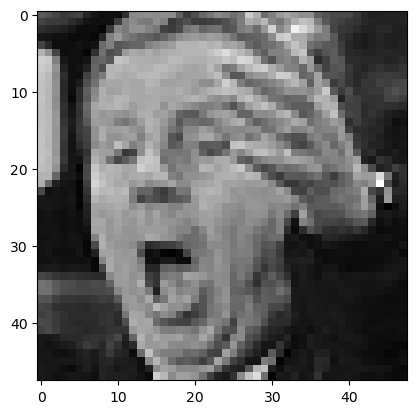

In [8]:
plt.imshow(im, 'gray')

In [9]:
confidence = 0.9
mp_face = mp.solutions.face_detection
face_detector = mp_face.FaceDetection(confidence)


def get_face(image):
    image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
    results = face_detector.process(image)
    if results.detections:
        for id, detection in enumerate(results.detections):
            h, w, c = image.shape
            bboxC = detection.location_data.relative_bounding_box
            x1, y1, width, height = int(bboxC.xmin*w), int(bboxC.ymin*h), int(bboxC.width*w), int(bboxC.height*h)
            x1, y1 = abs(x1), abs(y1)
            x2, y2 = x1 + width, y1 + height
            face = image[y1:y2, x1:x2]
            face = cv.cvtColor(face, cv.COLOR_RGB2GRAY)
            face = cv.resize(face, (160,160))
            face = np.expand_dims(face, -1)
            if_face = True
    else: 
        face = np.zeros((48,48))
        if_face = False
    return face, if_face


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


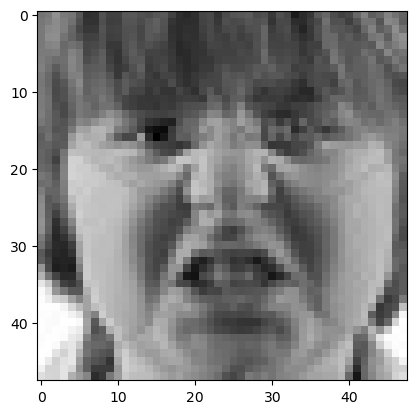

True


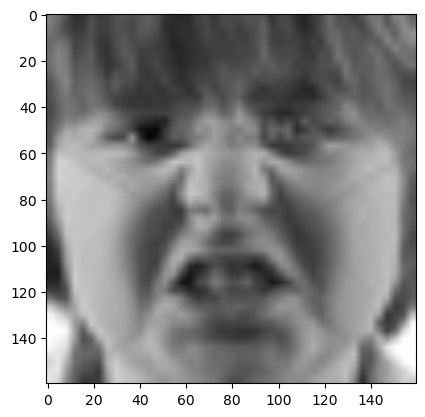

In [10]:
im = test_data['angry'][81]

face, if_face = get_face(im)

plt.imshow(im, 'gray')
plt.show()
print(if_face)
plt.imshow(face, 'gray')
plt.show()

In [11]:
X_test = np.array(np.zeros((160,160,1)))
y_test = []
class_num = 0

for emotion in emotions:
    for image in test_data[emotion]:
        face, if_face = get_face(image)
        if if_face:
            X_test = np.append(X_test, face, axis=2)
            y_test.append(class_num)
    class_num+=1
    

KeyboardInterrupt: 

In [11]:
X_test.shape

(160, 160, 6791)

In [12]:
X_test = np.transpose(X_test, (2, 0, 1))

0


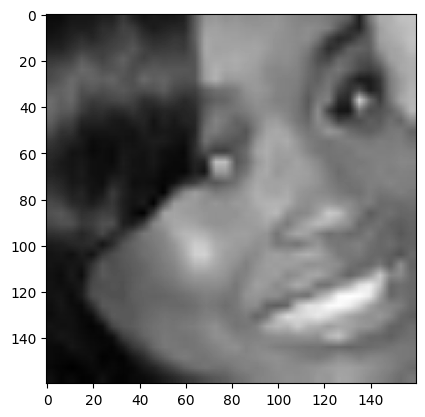

In [13]:
idx = 7
print(y_test[idx])
plt.imshow(X_test[idx], 'gray')

In [14]:
X_train = np.array(np.zeros((160,160,1)))
y_train = []
class_num = 0

for emotion in emotions:
    for image in train_data[emotion]:
        face, if_face = get_face(image)
        if if_face:
            X_train = np.append(X_train, face, axis=2)
            y_train.append(class_num)
    class_num+=1
    

In [15]:
X_train = np.transpose(X_train, (2, 0, 1))

In [16]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [17]:
X_train, X_test = np.expand_dims(X_train[1:], -1), np.expand_dims(X_test[1:], -1)

In [18]:
y_train, y_test = np.expand_dims(y_train, -1), np.expand_dims(y_test, -1)

In [19]:
X_test.shape, y_test.shape

((6790, 160, 160, 1), (6790, 1))

In [24]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

In [25]:
y_test[5988]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

[1. 0. 0. 0. 0. 0. 0.]


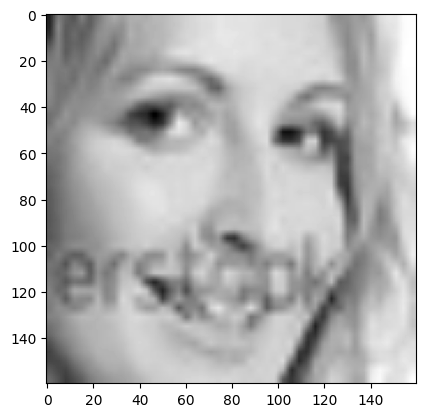

In [26]:
idx = 7
print(y_test[idx])
plt.imshow(X_test[idx], 'gray')

[0. 1. 0. 0. 0. 0. 0.]


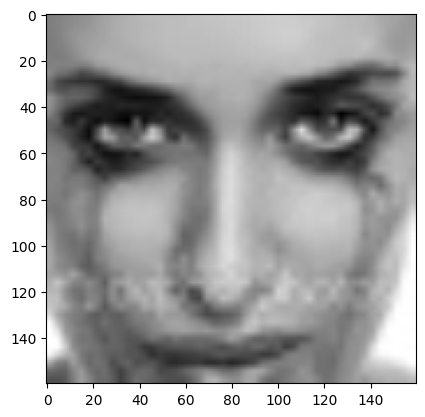

In [28]:
idx = 1748
print(y_train[idx])
plt.imshow(X_train[idx], 'gray')

In [30]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [31]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(30000).batch(128).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(10000).batch(128).prefetch(buffer_size=AUTOTUNE)

In [32]:
len(train_dataset),len(test_dataset)

(54, 54)

In [33]:
data_augmenter = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
#   tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.2, 0.2)
])

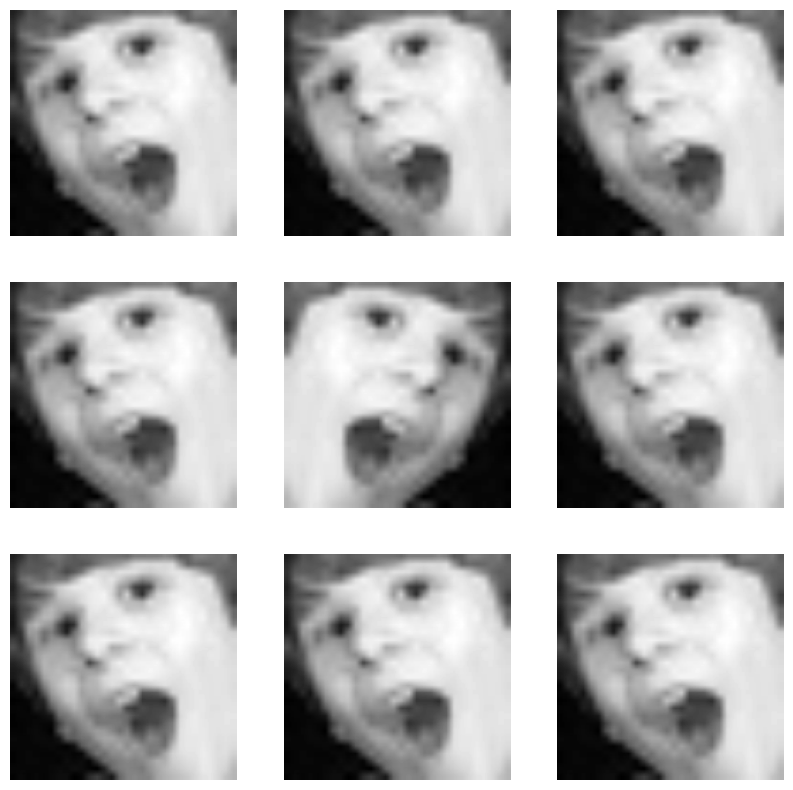

In [34]:
idx=1
img = X_test[idx]

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmenter(tf.expand_dims(img, 0))
    plt.imshow(augmented_image[0], 'gray')
    plt.axis('off')

In [38]:
initial_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(160,160,3),
    include_top=False,
    weights='imagenet'
)
initial_model.trainable = False 
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# for layer in initial_model.layers:
#     layer.trainable = False
    
inputs = Input(shape=(160, 160, 1))
x = data_augmenter(inputs) 
x = tf.image.grayscale_to_rgb(x)
x = preprocess_input(x)
x = initial_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.35)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


In [51]:

base_learning_rate = 0.002
model = tf.keras.models.load_model('model_checkpoint.h5')
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 1)       0         
                                                                 
 tf.image.grayscale_to_rgb_  (None, 160, 160, 3)       0         
 1 (TFOpLambda)                                                  
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                           

In [40]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', verbose=1, monitor='val_loss', mode='min', save_best_only=True)

callbacks = [model_checkpoint]

In [41]:
# !SYSTEM_VERSION_COMPAT=0 pip install tensorflow-macos tensorflow-metal

ERROR: Could not find a version that satisfies the requirement tensorflow-metal (from versions: none)
ERROR: No matching distribution found for tensorflow-metal


In [53]:
initial_epochs = 30
history = model.fit(train_dataset, validation_data=test_dataset, epochs=initial_epochs,
                    callbacks=callbacks)

Epoch 1/30
53/54 [============================>.] - ETA: 0s - loss: 1.3962 - accuracy: 0.4657
Epoch 1: val_loss improved from 1.22555 to 1.22337, saving model to model_checkpoint.h5
54/54 [==============================] - 55s 996ms/step - loss: 1.3965 - accuracy: 0.4655 - val_loss: 1.2234 - val_accuracy: 0.5477
Epoch 2/30


/Users/timii/Developer/miniconda3/envs/aienv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/54 [============================>.] - ETA: 0s - loss: 1.3721 - accuracy: 0.4822
Epoch 2: val_loss did not improve from 1.22337
54/54 [==============================] - 52s 970ms/step - loss: 1.3718 - accuracy: 0.4822 - val_loss: 1.2496 - val_accuracy: 0.5321
Epoch 3/30
53/54 [============================>.] - ETA: 0s - loss: 1.3495 - accuracy: 0.4910
Epoch 3: val_loss improved from 1.22337 to 1.21364, saving model to model_checkpoint.h5
54/54 [==============================] - 49s 906ms/step - loss: 1.3495 - accuracy: 0.4910 - val_loss: 1.2136 - val_accuracy: 0.5515
Epoch 4/30
53/54 [============================>.] - ETA: 0s - loss: 1.3518 - accuracy: 0.4950
Epoch 4: val_loss improved from 1.21364 to 1.20595, saving model to model_checkpoint.h5
54/54 [==============================] - 48s 894ms/step - loss: 1.3518 - accuracy: 0.4950 - val_loss: 1.2060 - val_accuracy: 0.5492
Epoch 5/30
53/54 [============================>.] - ETA: 0s - loss: 1.3314 - accuracy: 0.4944
Epoch 5: val_los

In [54]:
model.save('emotionNet.h5')

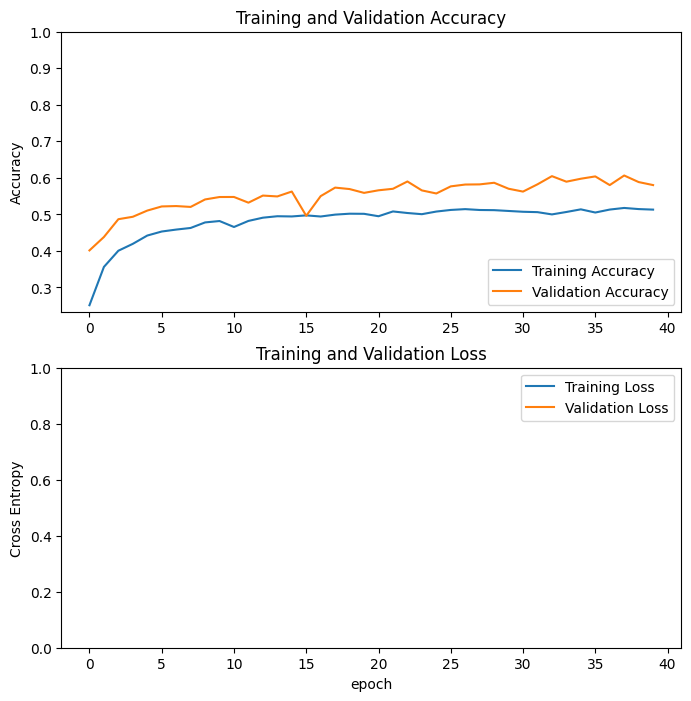

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [77]:
model.trainable = True
print("Number of layers in the base model: ", len(model.layers))

fine_tune_at = 120


for layer in model.layers[:fine_tune_at]:
    layer.trainable = False
    
loss_function=tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.1*base_learning_rate)
metrics= ['accuracy']

model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)


Number of layers in the base model:  9


In [58]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 1)       0         
                                                                 
 tf.image.grayscale_to_rgb_  (None, 160, 160, 3)       0         
 1 (TFOpLambda)                                                  
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                           

In [59]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                        callbacks=callbacks)              


Epoch 30/40
53/54 [============================>.] - ETA: 0s - loss: 1.2273 - accuracy: 0.5363
Epoch 30: val_loss improved from 1.07947 to 1.06718, saving model to model_checkpoint.h5
54/54 [==============================] - 53s 960ms/step - loss: 1.2281 - accuracy: 0.5361 - val_loss: 1.0672 - val_accuracy: 0.6059
Epoch 31/40
53/54 [============================>.] - ETA: 0s - loss: 1.2416 - accuracy: 0.5296
Epoch 31: val_loss improved from 1.06718 to 1.06676, saving model to model_checkpoint.h5
54/54 [==============================] - 50s 929ms/step - loss: 1.2415 - accuracy: 0.5297 - val_loss: 1.0668 - val_accuracy: 0.6069
Epoch 32/40
53/54 [============================>.] - ETA: 0s - loss: 1.2393 - accuracy: 0.5349
Epoch 32: val_loss improved from 1.06676 to 1.06674, saving model to model_checkpoint.h5
54/54 [==============================] - 48s 891ms/step - loss: 1.2395 - accuracy: 0.5348 - val_loss: 1.0667 - val_accuracy: 0.6066
Epoch 33/40
53/54 [============================>.] -

In [63]:
model.save('emotionNet.h5')

/Users/timii/Developer/miniconda3/envs/aienv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

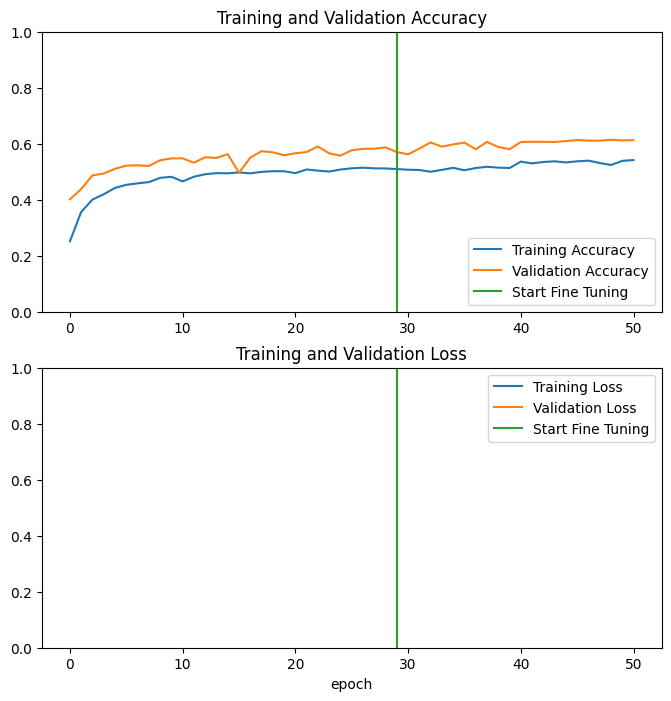

In [67]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [82]:
#Extra Fine Tuning
model.trainable = True

for layer in model.layers:
    layer.trainable = True
loss_function=tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001*base_learning_rate)
metrics= ['accuracy']

model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)


In [79]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 1)       0         
                                                                 
 tf.image.grayscale_to_rgb_  (None, 160, 160, 3)       0         
 1 (TFOpLambda)                                                  
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                           

In [83]:
x_fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs + x_fine_tune_epochs

history_fine2 = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history_fine.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=callbacks)              


Epoch 40/50
 5/54 [=>............................] - ETA: 2:09 - loss: 1.9477 - accuracy: 0.1859

KeyboardInterrupt: 